In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install flair

     |████████████████████████████████| 401 kB 5.3 MB/s 
     |████████████████████████████████| 19.7 MB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 1.6 MB 34.3 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 48 kB 4.2 MB/s 
     |████████████████████████████████| 4.0 MB 30.0 MB/s 
     |████████████████████████████████| 1.2 MB 45.3 MB/s 
     |████████████████████████████████| 788 kB 49.7 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 981 kB 42.1 MB/s 
     |████████████████████████████████| 199 kB 51.2 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 596 kB 47.6 MB/s 
     |████████████████████████████████| 6.6 MB 41.1 MB/s 
     |█████████

In [ ]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd
import json
import pickle
import flair

In [ ]:
import os

print(os.chdir('/content/drive/MyDrive'))
print(os.getcwd())
asianpaint=json.load(open('HDFCBANK1.json','rb'))
asianpaint['0']


None
/content/drive/MyDrive


{'_type': 'snscrape.modules.twitter.Tweet',
 'cashtags': None,
 'content': "We strongly condemned such working culture @HDFC_Bank where an accused personnel #ReemaKaimal is unstoppable to violate the rules &amp; law made by @RBI @RBI .Now it's upto @HDFCBank_Cares to take action otherwise we are already  #court @EconomicTimes @THNewDelhi  #PunishReemaKaimal https://t.co/B2e6DdV1Y8",
 'conversationId': 1514747240174215170,
 'coordinates': None,
 'date': '2022-04-14T23:27:41+00:00',
 'hashtags': ['ReemaKaimal', 'court', 'PunishReemaKaimal'],
 'id': 1514747249414524929,
 'inReplyToTweetId': 1514747240174215170,
 'inReplyToUser': {'_type': 'snscrape.modules.twitter.User',
  'created': '2022-02-11T18:36:52+00:00',
  'description': 'Chase own passions',
  'descriptionUrls': None,
  'displayname': 'Dr Nitesh Tripathi',
  'favouritesCount': 20,
  'followersCount': 3,
  'friendsCount': 1,
  'id': 1492205663594115072,
  'label': None,
  'linkTcourl': None,
  'linkUrl': None,
  'listedCount': 0,


In [ ]:
cdata = pd.DataFrame(columns=['Date','Tweets'])

for i in asianpaint:
    tweet = asianpaint[i]['content']
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', tweet)
    temp_df = pd.DataFrame([[asianpaint[i]['date'][:10], my_new_string]], columns = ['Date', 'Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)

In [ ]:
cdata

,Date,Tweets
0,2022-04-14,We strongly condemned such working culture HDF...
1,2022-04-14,HDFC Bank Q4 results preview Heres what to exp...
2,2022-04-14,HDFC Bank Q4 results preview Heres what to exp...
3,2022-04-14,Shubham7777 AxisBank HDFCBank ICICIBank YESBAN...
4,2022-04-14,Its more over 30 days but still resolve the is...
...,...,...
52119,2022-04-14,AshishagrawalCa Hi Ashish I understand the inc...
52120,2022-04-14,MadhavKhosla6 Hi Madhav please DM us the compl...
52121,2022-04-14,Top Nifty LosersHDFCBANK Change 198Open Price...
52122,2022-04-14,PRSundar64 How hdfc bank merger with hdfc goin...


In [ ]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])


In [ ]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [ ]:
ccdata

,Date,Tweets
0,2022-04-14,We strongly condemned such working culture HDF...
1,2022-04-13,techtalk360 HDFCBank HDFCBankCares Then you c...
2,2022-04-12,HDFCBankCares hello I blocked my credit card ...
3,2022-04-11,HDFCBankCares Ok Sir Im waiting Please get it...
4,2022-04-10,NARENPR46905293 ICICIBank HDFCBankCares ICICI...
5,2022-04-09,StutiNMishra HDFCBank Cant you update your ad...
6,2022-04-08,HDFCBankCares HDFCERGOGIC I was doing a paym...
7,2022-04-07,Stocks in Focus on Apr 7 Titan HDFC Bank Coff...
8,2022-04-06,HDFC Bank Plans To Raise Rs 50000 Crore Via B...
9,2022-04-05,dintya15 Respected SirMaine HDFC bank se BC k...


In [ ]:

f = open('stock_prices.json')
 

data = json.load(f)
stock_p = data["FIN"]['HDFCBANK']['Time Series (Daily)']
stock_p

{'2021-11-22': {'1. open': '1539.6000',
  '2. high': '1553.4000',
  '3. low': '1499.0500',
  '4. close': '1515.2000',
  '5. volume': '998009'},
 '2021-11-23': {'1. open': '1510.0000',
  '2. high': '1527.4000',
  '3. low': '1496.7000',
  '4. close': '1516.8000',
  '5. volume': '104588'},
 '2021-11-24': {'1. open': '1523.0000',
  '2. high': '1536.4500',
  '3. low': '1514.7000',
  '4. close': '1518.3500',
  '5. volume': '156241'},
 '2021-11-25': {'1. open': '1507.0000',
  '2. high': '1533.0000',
  '3. low': '1506.6000',
  '4. close': '1524.2500',
  '5. volume': '111057'},
 '2021-11-26': {'1. open': '1506.0000',
  '2. high': '1507.1000',
  '3. low': '1485.5500',
  '4. close': '1490.1000',
  '5. volume': '120452'},
 '2021-11-29': {'1. open': '1485.1500',
  '2. high': '1507.3000',
  '3. low': '1461.5000',
  '4. close': '1501.2000',
  '5. volume': '306032'},
 '2021-11-30': {'1. open': '1494.0000',
  '2. high': '1529.0500',
  '3. low': '1486.2500',
  '4. close': '1493.6000',
  '5. volume': '10

In [ ]:
stock_pp = pd.DataFrame(columns=['Date','Open', 'High', 'Low', 'Close', 'Adj. Close', 'Volume'])
stock_pp

,Date,Open,High,Low,Close,Adj. Close,Volume


In [ ]:
for i in stock_p:
    temp_df = pd.DataFrame([[i, stock_p[i]['1. open'],stock_p[i]['2. high'],stock_p[i]['3. low'],stock_p[i]['4. close'],0,stock_p[i]['5. volume']]], columns = ['Date','Open', 'High', 'Low', 'Close', 'Adj. Close', 'Volume'])
    stock_pp = pd.concat([stock_pp, temp_df], axis = 0).reset_index(drop = True)

In [ ]:
stock_pp

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2022-04-13,1492.9000,1501.9500,1462.3500,1464.8500,0,286246
1,2022-04-12,1483.9000,1507.0000,1481.0000,1493.2500,0,463987
2,2022-04-11,1510.0000,1510.0000,1494.0000,1496.2000,0,413938
3,2022-04-08,1513.0000,1525.0000,1496.9500,1515.1000,0,472233
4,2022-04-07,1543.7500,1543.7500,1514.0000,1516.9000,0,263571
...,...,...,...,...,...,...,...
95,2021-11-26,1506.0000,1507.1000,1485.5500,1490.1000,0,120452
96,2021-11-25,1507.0000,1533.0000,1506.6000,1524.2500,0,111057
97,2021-11-24,1523.0000,1536.4500,1514.7000,1518.3500,0,156241
98,2021-11-23,1510.0000,1527.4000,1496.7000,1516.8000,0,104588


In [ ]:
ccdata['Prices'] = ''

In [ ]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(stock_pp)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=stock_pp.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(float(stock_pp.Close[j]))

In [ ]:
ccdata

,Date,Tweets,Prices
0,2022-04-14,We strongly condemned such working culture HDF...,
1,2022-04-13,techtalk360 HDFCBank HDFCBankCares Then you c...,1464
2,2022-04-12,HDFCBankCares hello I blocked my credit card ...,1493
3,2022-04-11,HDFCBankCares Ok Sir Im waiting Please get it...,1496
4,2022-04-10,NARENPR46905293 ICICIBank HDFCBankCares ICICI...,
5,2022-04-09,StutiNMishra HDFCBank Cant you update your ad...,
6,2022-04-08,HDFCBankCares HDFCERGOGIC I was doing a paym...,1515
7,2022-04-07,Stocks in Focus on Apr 7 Titan HDFC Bank Coff...,1516
8,2022-04-06,HDFC Bank Plans To Raise Rs 50000 Crore Via B...,1550
9,2022-04-05,dintya15 Respected SirMaine HDFC bank se BC k...,1607


In [ ]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

In [ ]:
ccdata

,Date,Tweets,Prices
0,2022-04-14,We strongly condemned such working culture HDF...,1527
1,2022-04-13,techtalk360 HDFCBank HDFCBankCares Then you c...,1464
2,2022-04-12,HDFCBankCares hello I blocked my credit card ...,1493
3,2022-04-11,HDFCBankCares Ok Sir Im waiting Please get it...,1496
4,2022-04-10,NARENPR46905293 ICICIBank HDFCBankCares ICICI...,1527
5,2022-04-09,StutiNMishra HDFCBank Cant you update your ad...,1527
6,2022-04-08,HDFCBankCares HDFCERGOGIC I was doing a paym...,1515
7,2022-04-07,Stocks in Focus on Apr 7 Titan HDFC Bank Coff...,1516
8,2022-04-06,HDFC Bank Plans To Raise Rs 50000 Crore Via B...,1550
9,2022-04-05,dintya15 Respected SirMaine HDFC bank se BC k...,1607


In [ ]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)


In [ ]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-04-14,We strongly condemned such working culture HDF...,1527,,,,
1,2022-04-13,techtalk360 HDFCBank HDFCBankCares Then you c...,1464,,,,
2,2022-04-12,HDFCBankCares hello I blocked my credit card ...,1493,,,,
3,2022-04-11,HDFCBankCares Ok Sir Im waiting Please get it...,1496,,,,
4,2022-04-10,NARENPR46905293 ICICIBank HDFCBankCares ICICI...,1527,,,,
5,2022-04-09,StutiNMishra HDFCBank Cant you update your ad...,1527,,,,
6,2022-04-08,HDFCBankCares HDFCERGOGIC I was doing a paym...,1515,,,,
7,2022-04-07,Stocks in Focus on Apr 7 Titan HDFC Bank Coff...,1516,,,,
8,2022-04-06,HDFC Bank Plans To Raise Rs 50000 Crore Via B...,1550,,,,
9,2022-04-05,dintya15 Respected SirMaine HDFC bank se BC k...,1607,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()

In [ ]:
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-04-14,We strongly condemned such working culture HDF...,1527,1.0,0.081,0.773,1.0
1,2022-04-13,techtalk360 HDFCBank HDFCBankCares Then you c...,1464,1.0,0.085,0.775,1.0
2,2022-04-12,HDFCBankCares hello I blocked my credit card ...,1493,1.0,0.081,0.778,1.0
3,2022-04-11,HDFCBankCares Ok Sir Im waiting Please get it...,1496,1.0,0.073,0.768,1.0
4,2022-04-10,NARENPR46905293 ICICIBank HDFCBankCares ICICI...,1527,1.0,0.062,0.793,1.0
5,2022-04-09,StutiNMishra HDFCBank Cant you update your ad...,1527,1.0,0.074,0.776,1.0
6,2022-04-08,HDFCBankCares HDFCERGOGIC I was doing a paym...,1515,1.0,0.07,0.779,1.0
7,2022-04-07,Stocks in Focus on Apr 7 Titan HDFC Bank Coff...,1516,1.0,0.065,0.793,1.0
8,2022-04-06,HDFC Bank Plans To Raise Rs 50000 Crore Via B...,1550,1.0,0.072,0.783,1.0
9,2022-04-05,dintya15 Respected SirMaine HDFC bank se BC k...,1607,1.0,0.059,0.805,1.0


% of positive tweets=  100.0
% of negative tweets=  0.0


[]

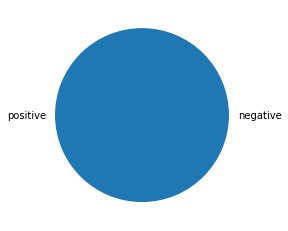

In [ ]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [ ]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2022-04-14,1527,1.0,0.081,0.773,1.0
1,2022-04-13,1464,1.0,0.085,0.775,1.0
2,2022-04-12,1493,1.0,0.081,0.778,1.0
3,2022-04-11,1496,1.0,0.073,0.768,1.0
4,2022-04-10,1527,1.0,0.062,0.793,1.0
5,2022-04-09,1527,1.0,0.074,0.776,1.0
6,2022-04-08,1515,1.0,0.07,0.779,1.0
7,2022-04-07,1516,1.0,0.065,0.793,1.0
8,2022-04-06,1550,1.0,0.072,0.783,1.0
9,2022-04-05,1607,1.0,0.059,0.805,1.0


In [ ]:
df_.to_csv("out.csv")

In [ ]:
df=pd.read_csv("TATA.csv")
df

,predict,C1,Date,Prices,Comp,Negative,Neutral,Positive
0,3205.922837,0,1638835200000,3031,0.9999,0.061,0.794,0.9999
1,3180.733979,2,1639008000000,3178,0.9999,0.056,0.815,0.9999
2,3290.792480,10,1639699200000,3241,0.9999,0.052,0.812,0.9999
3,3264.699951,21,1640649600000,3367,0.9999,0.055,0.780,0.9999
4,3295.330176,22,1640736000000,3369,0.9999,0.070,0.785,0.9999
5,3286.399136,24,1640908800000,3381,0.9999,0.045,0.797,0.9999
6,3239.353838,32,1641600000000,3185,0.9999,0.059,0.790,0.9999
7,3284.310400,35,1641859200000,3536,0.9999,0.065,0.796,0.9999
8,3293.021182,36,1641945600000,3544,0.9999,0.066,0.787,0.9999
9,3277.656309,40,1642291200000,3185,0.9999,0.039,0.821,0.9999


In [ ]:

df_o=pd.read_csv("TATAMOT.csv")
df_o

,Unnamed: 0,Date,Prices,Comp,Negative,Neutral,Positive
0,0,2021-12-07,3031,0.9999,0.061,0.794,0.9999
1,1,2021-12-08,3109,0.9999,0.063,0.796,0.9999
2,2,2021-12-09,3178,0.9999,0.056,0.815,0.9999
3,3,2021-12-10,3281,0.9999,0.055,0.798,0.9999
4,4,2021-12-11,3185,0.9998,0.072,0.798,0.9998
...,...,...,...,...,...,...,...
138,138,2022-04-24,3185,0.9998,0.072,0.794,0.9998
139,139,2022-04-25,3130,0.9999,0.058,0.800,0.9999
140,140,2022-04-26,3125,0.9998,0.083,0.787,0.9998
141,141,2022-04-27,3148,0.9999,0.088,0.741,0.9999


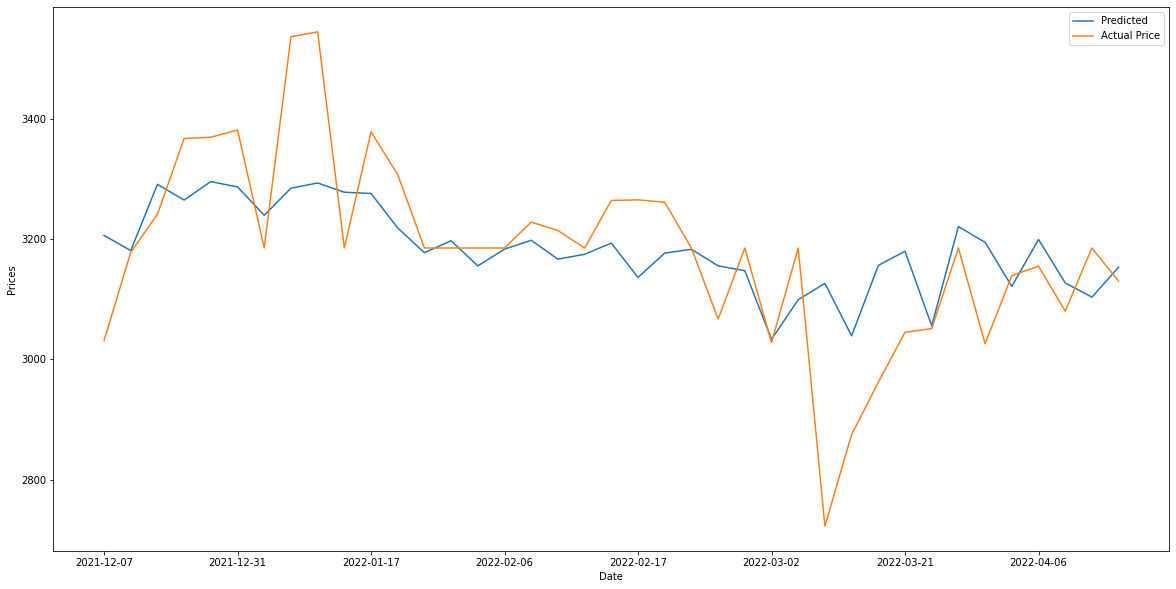

In [ ]:
# import matplotlib.pyplot as plt

dff=pd.merge(df, df_o, left_on="C1", right_on="Unnamed: 0", how="inner")
dff
# datetime.fromtimestamp(1649289600000).strftime("%A, %B %d, %Y %I:%M:%S")
dff["Date"]=dff["Date_y"]
dff["Actual Price"]=dff["Prices_x"]
dff["Predicted"]=dff["predict"]
ax=dff.plot(x="Date", y=["Predicted", "Actual Price"], ylabel="Prices", figsize=(20, 10))

In [ ]:
dff["rmse"]=(dff["predict"]-dff["Prices_x"])**2
# dff["rmse"]=dff["rmse"]/((dff["Prices_x"]))
dff

,predict,C1,Date_x,Prices_x,Comp_x,Negative_x,Neutral_x,Positive_x,Unnamed: 0,Date_y,Prices_y,Comp_y,Negative_y,Neutral_y,Positive_y,Date,Actual Price,Predicted,rmse
0,3235.968335,7,1639440000000,3294,0.8748,0.014,0.930,0.8748,7,2021-12-14,3294,0.8748,0.014,0.930,0.8748,2021-12-14,3294,3235.968335,3367.674147
1,3225.106670,9,1639612800000,3298,0.9592,0.010,0.873,0.9592,9,2021-12-16,3298,0.9592,0.010,0.873,0.9592,2021-12-16,3298,3225.106670,5313.437570
2,3191.865000,17,1640304000000,3288,-0.5924,0.057,0.877,-0.5924,17,2021-12-24,3288,-0.5924,0.057,0.877,-0.5924,2021-12-24,3288,3191.865000,9241.938225
3,3158.345000,19,1640476800000,3185,-0.5106,0.301,0.699,-0.5106,19,2021-12-26,3185,-0.5106,0.301,0.699,-0.5106,2021-12-26,3185,3158.345000,710.489025
4,3282.180000,20,1640563200000,3273,0.7003,0.024,0.918,0.7003,20,2021-12-27,3273,0.7003,0.024,0.918,0.7003,2021-12-27,3273,3282.180000,84.272400
5,3279.126665,21,1640649600000,3367,0.9924,0.039,0.856,0.9924,21,2021-12-28,3367,0.9924,0.039,0.856,0.9924,2021-12-28,3367,3279.126665,7721.722997
6,3244.448335,22,1640736000000,3369,0.8941,0.010,0.917,0.8941,22,2021-12-29,3369,0.8941,0.010,0.917,0.8941,2021-12-29,3369,3244.448335,15513.117264
7,3210.988877,26,1641081600000,3185,0.5160,0.000,0.935,0.5160,26,2022-01-02,3185,0.5160,0.000,0.935,0.5160,2022-01-02,3185,3210.988877,675.421725
8,3376.114854,27,1641168000000,3421,0.8834,0.045,0.858,0.8834,27,2022-01-03,3421,0.8834,0.045,0.858,0.8834,2022-01-03,3421,3376.114854,2014.676375
9,3316.382998,31,1641513600000,3574,0.9477,0.030,0.892,0.9477,31,2022-01-07,3574,0.9477,0.030,0.892,0.9477,2022-01-07,3574,3316.382998,66366.519695


In [ ]:
import math
a=dff["rmse"].sum()
math.sqrt(a)

791.3540488819328